# **GENEROWANIE DANYCH (Data generation)**

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from faker import Faker
import random

# Inicjalizacja Faker do generowania losowych danych
fake = Faker()

# Ustawienia parametrów
num_records = 5000
games = ['Slot Machine', 'Blackjack', 'Roulette', 'Poker']
outcomes = ['Win', 'Lose']
player_ids = [fake.uuid4() for _ in range(100)]  # 100 unikalnych graczy

# Generowanie danych
data = []
for _ in range(num_records):
    player_id = random.choice(player_ids)
    game = random.choice(games)
    stake = round(random.uniform(1, 100), 2)  # Stawka od 1 do 100
    outcome = random.choice(outcomes)
    balance_before = round(random.uniform(100, 10000), 2)  # Saldo przed grą od 100 do 10000
    balance_after = balance_before + stake if outcome == 'Win' else balance_before - stake
    game_date = fake.date_time_this_year()

    data.append([player_id, game_date, game, stake, outcome, balance_before, balance_after])

# Tworzenie DataFrame
df = pd.DataFrame(data, columns=['PlayerID', 'GameDate', 'Game', 'Stake', 'Outcome', 'BalanceBefore', 'BalanceAfter'])

# Zapisanie danych do CSV
df.to_csv('casino_data.csv', index=False)

# Wyświetlenie pierwszych kilku rekordów
df.head()


,PlayerID,GameDate,Game,Stake,Outcome,BalanceBefore,BalanceAfter
0,7cf56f3d-8df1-4adf-9dfc-0a0acce4ab3b,2024-02-19 09:46:08.669137,Roulette,78.69,Win,2353.16,2431.85
1,514db667-dbf7-4007-a857-98c65c611076,2024-03-20 01:03:42.827350,Blackjack,19.30,Lose,3489.72,3470.42
2,5ee86793-f9fd-496c-b51b-b8f99876173b,2024-06-23 10:11:10.985169,Slot Machine,86.45,Win,9251.93,9338.38
3,72884643-e5f3-489d-902e-365c6e5f0ec9,2024-05-14 23:20:54.563789,Slot Machine,79.77,Lose,7505.90,7426.13
4,16eb4ea6-000a-4398-8c0d-1f0eb92ff765,2024-06-05 19:24:44.192289,Roulette,7.41,Win,1073.53,1080.94


# **ANALIZA DANYCH (Data Analys)**

In [5]:
import pandas as pd

df = pd.read_csv('casino_data.csv')

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerID       5000 non-null   object 
 1   GameDate       5000 non-null   object 
 2   Game           5000 non-null   object 
 3   Stake          5000 non-null   float64
 4   Outcome        5000 non-null   object 
 5   BalanceBefore  5000 non-null   float64
 6   BalanceAfter   5000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


,Stake,BalanceBefore,BalanceAfter
count,5000.000000,5000.000000,5000.000000
mean,50.350344,5017.842868,5016.676212
std,28.627953,2852.193174,2853.195166
min,1.000000,100.210000,28.860000
25%,25.477500,2531.135000,2539.040000
50%,50.270000,5041.150000,5027.675000
75%,75.395000,7497.507500,7478.230000
max,99.970000,9998.540000,10065.960000


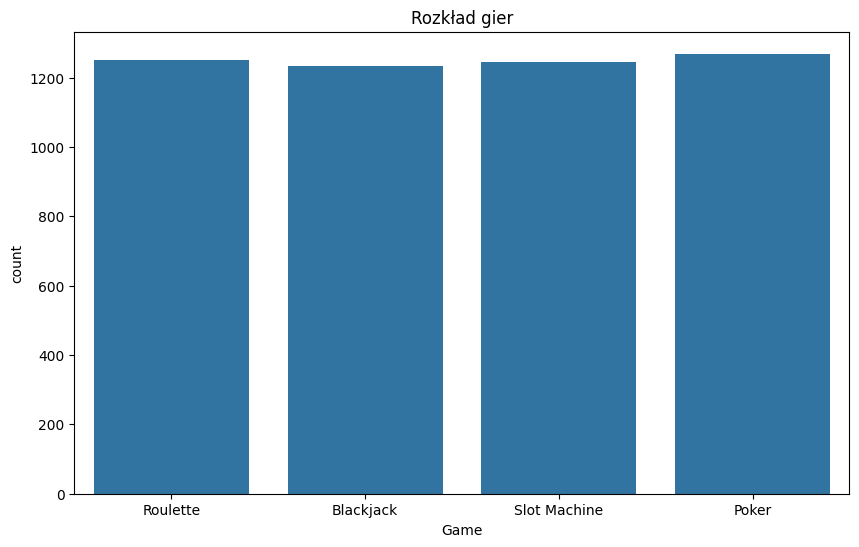

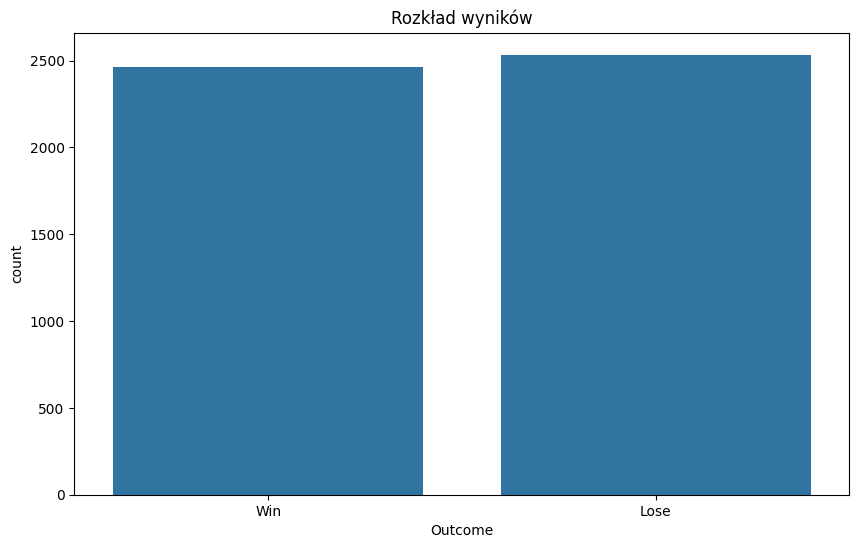

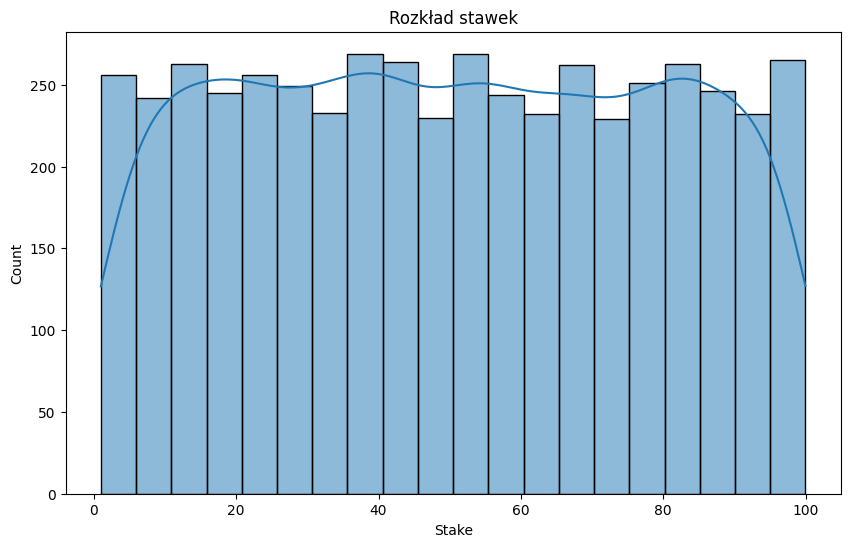

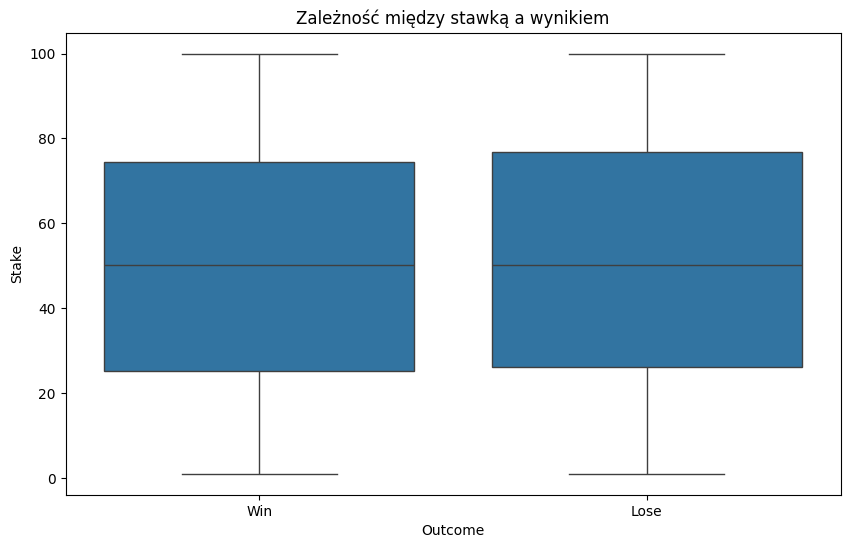

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rozkład gier
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Game')
plt.title('Rozkład gier')
plt.show()

# Rozkład wyników
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Rozkład wyników')
plt.show()

# Rozkład stawek
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Stake', bins=20, kde=True)
plt.title('Rozkład stawek')
plt.show()

# Zależność między stawką a wynikiem
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='Stake')
plt.title('Zależność między stawką a wynikiem')
plt.show()


# **MODELOWANIE ZACHOWAŃ GRACZY (Player Behavior Modeling)**


In [9]:
df['OutcomeBinary'] = df['Outcome'].apply(lambda x: 1 if x == 'Win' else 0)
X = df[['Stake', 'BalanceBefore', 'BalanceAfter']]
y = df['OutcomeBinary']

#Podział na zbiór testowy i treningowy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Trenowanie modelu
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Model accuracy: 1.0
Confusion Matrix:
 [[510   0]
 [  0 490]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       510
           1       1.00      1.00      1.00       490

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# **OPTYMALIZACJA GIER I STRATEGII (game and strategy optimization)**

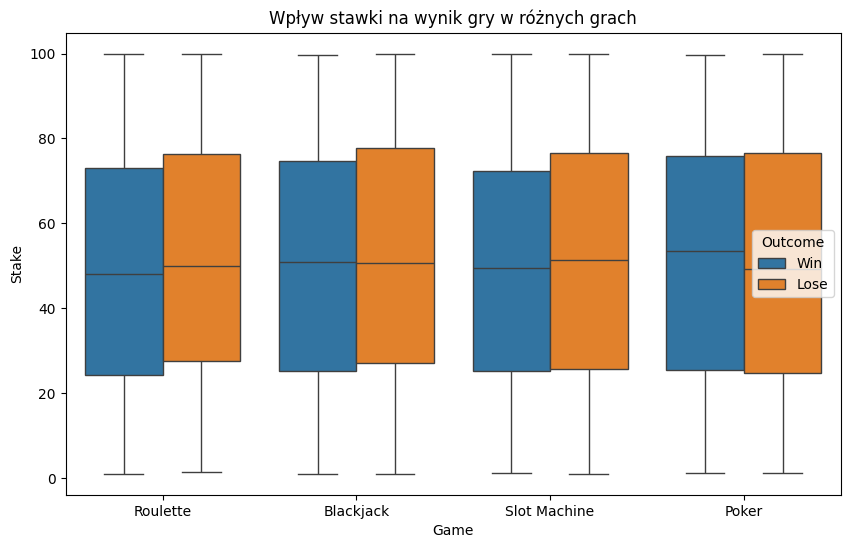

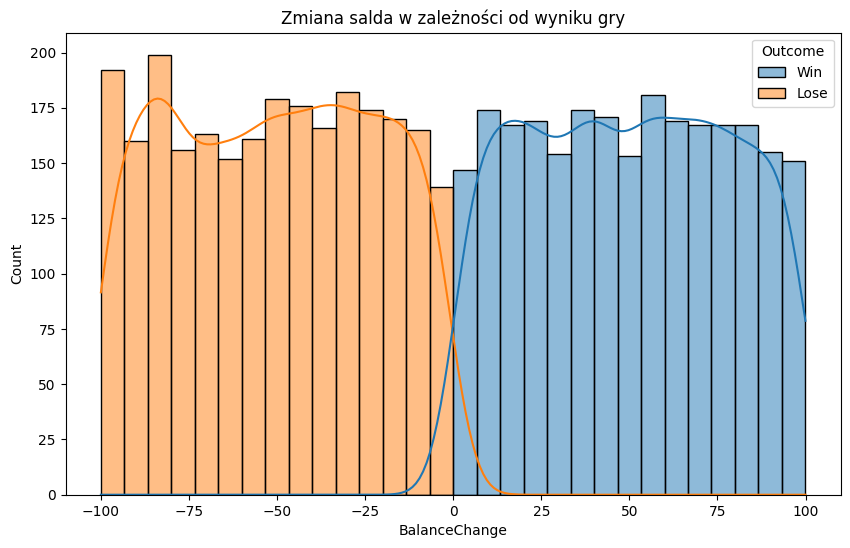

In [11]:
# Analiza wpływu stawki na wynik gry
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Game', y='Stake', hue='Outcome')
plt.title('Wpływ stawki na wynik gry w różnych grach')
plt.show()

# Analiza zmiany salda przed i po grze
df['BalanceChange'] = df['BalanceAfter'] - df['BalanceBefore']
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BalanceChange', bins=30, kde=True, hue='Outcome')
plt.title('Zmiana salda w zależności od wyniku gry')
plt.show()

# **PERSONALIZACJA DOŚWIADCZEŃ GRACZA (Personalizing The Player Experience)**

In [13]:
# Tworzenie macierzy użytkowników i gier
game_matrix = df.pivot_table(index='PlayerID', columns='Game', values='Stake', aggfunc='mean').fillna(0)
print(game_matrix.head())


Game                                  Blackjack      Poker   Roulette  \
PlayerID                                                                
018b3318-3f61-4bbd-b6f5-fac255267be2  37.829333  50.769231  48.494000   
01abab18-502c-4154-9ca5-514cf39a06b0  63.957000  53.658125  44.729091   
02c41786-6847-4322-9232-3c5dc8168381  67.250000  54.344444  52.349333   
03a7e92f-15e4-4b06-a143-a23bef0baa6c  50.515556  37.657647  46.379091   
04d6113d-16fe-4526-8d7c-ba7b744bc64b  43.505000  43.616000  60.293333   

Game                                  Slot Machine  
PlayerID                                            
018b3318-3f61-4bbd-b6f5-fac255267be2     54.905714  
01abab18-502c-4154-9ca5-514cf39a06b0     36.241000  
02c41786-6847-4322-9232-3c5dc8168381     59.992000  
03a7e92f-15e4-4b06-a143-a23bef0baa6c     67.731250  
04d6113d-16fe-4526-8d7c-ba7b744bc64b     54.147000  


In [30]:
from sklearn.neighbors import NearestNeighbors
import random

# Trenowanie modelu k-NN
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(game_matrix)

# Funkcja rekomendująca gry dla gracza
def recommend_games(player_id, num_recommendations=3):
    if player_id not in game_matrix.index:
        print(f"Player ID {player_id} not found in game_matrix.")
        return []

    # Liczba sąsiadów nie może przekraczać liczby dostępnych graczy
    n_neighbors = min(num_recommendations + 1, game_matrix.shape[0])

    print(f"Using {n_neighbors} neighbors for player {player_id}")

    distances, indices = model_knn.kneighbors(game_matrix.loc[player_id].values.reshape(1, -1), n_neighbors=n_neighbors)
    print(f"Distances: {distances}")
    print(f"Indices: {indices}")

    similar_players = [game_matrix.index[idx] for idx in indices.flatten()]
    print(f"Similar players: {similar_players}")

    # Liczymy średnie stawki dla każdej gry wśród podobnych graczy
    similar_players_data = game_matrix.loc[similar_players]
    mean_stakes = similar_players_data.mean(axis=0)

    # Sortujemy gry według średnich stawek, w porządku malejącym
    recommended_games = mean_stakes.sort_values(ascending=False).index.tolist()

    # Usuwamy gry, które nasz gracz już grał z większą stawką niż średnia podobnych graczy
    for game in game_matrix.columns:
        if game_matrix.loc[player_id, game] >= mean_stakes[game]:
            recommended_games.remove(game)

    return recommended_games[:num_recommendations]

# Sprawdzenie, czy player_ids znajdują się w game_matrix
print("Player IDs in game_matrix:")
print(game_matrix.index.tolist())

# Wybór losowego gracza z game_matrix
sample_player_id = random.choice(game_matrix.index.tolist())
recommendations = recommend_games(sample_player_id)
print(f"Rekomendowane gry dla gracza {sample_player_id}: {recommendations}")


Player IDs in game_matrix:
['018b3318-3f61-4bbd-b6f5-fac255267be2', '01abab18-502c-4154-9ca5-514cf39a06b0', '02c41786-6847-4322-9232-3c5dc8168381', '03a7e92f-15e4-4b06-a143-a23bef0baa6c', '04d6113d-16fe-4526-8d7c-ba7b744bc64b', '09eb85bf-2d62-4c41-89cf-ee4461741801', '108d8d46-3655-47a7-a281-69215c050f3d', '10f05583-d665-4c16-8841-c82466510926', '114f79d2-94f6-4422-94cb-3a59b1ecf62a', '14a294e3-196b-44ec-bc7d-c10cd058d7bb', '16eb4ea6-000a-4398-8c0d-1f0eb92ff765', '19b5bcbf-aa0e-424b-a056-dd2278a8aae8', '226f466f-b4a0-4057-9963-3bb6473da3e3', '262eeb82-a3a4-4ec1-bfae-ed2336c724c9', '27442d4a-8544-46f7-aa6b-908470fe289f', '28b54220-6cf3-4f05-a2ab-14f26a762abb', '29bfe4a2-99f9-449b-9f4c-a78c1f2e7717', '2bd68890-ca0a-43a9-b9b1-bff6b2e5daec', '30801307-de86-4579-b952-87c7f5983979', '30aa5b50-e879-4366-8b59-779d0dcbd49d', '3a04c608-ebce-4233-96d6-a4e13f9cfe18', '3e447f25-8cb4-46df-aebf-306f5ee3242b', '3f8536dd-4241-455d-9728-dc416cc845d1', '3f8d4c71-080b-4c57-922b-c92e527ea254', '401f5424-24

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


# **OPTYMALNY MODEL WYBORU GRY (Optimal Game Selection Model)**

In [31]:
import pandas as pd

# Wczytanie danych z pliku CSV
df = pd.read_csv('casino_data.csv')

# Obliczenie średnich strat i zysków dla każdej gry
game_stats = df.groupby('Game').agg(
    total_stake=pd.NamedAgg(column='Stake', aggfunc='sum'),
    total_balance_change=pd.NamedAgg(column='BalanceAfter', aggfunc=lambda x: x.iloc[-1] - x.iloc[0])
).reset_index()

# Obliczenie średniej straty i zysku dla każdej gry
game_stats['average_loss'] = game_stats['total_stake'] - game_stats['total_balance_change']
game_stats['average_gain'] = game_stats['total_balance_change']

# Obliczenie stosunku zysków do strat
game_stats['gain_loss_ratio'] = game_stats['average_gain'] / game_stats['average_loss']

# Funkcja zwracająca grę o najlepszym stosunku zysków do strat
def best_game_to_play(game_stats):
    # Wybranie gry o najwyższym stosunku zysków do strat
    best_game = game_stats.loc[game_stats['gain_loss_ratio'].idxmax()]
    return best_game

# Znalezienie najlepszej gry do grania
best_game = best_game_to_play(game_stats)
print(f"Najlepsza gra do grania to: {best_game['Game']}")
print(f"Szczegóły: \n{best_game}")

# Wyświetlenie wyników
print(game_stats)


Najlepsza gra do grania to: Blackjack
Szczegóły: 
Game                    Blackjack
total_stake               62566.1
total_balance_change      1313.97
average_loss             61252.13
average_gain              1313.97
gain_loss_ratio          0.021452
Name: 0, dtype: object
           Game  total_stake  total_balance_change  average_loss  \
0     Blackjack     62566.10               1313.97      61252.13   
1         Poker     64117.40                678.78      63438.62   
2      Roulette     62616.37                398.24      62218.13   
3  Slot Machine     62451.85              -5751.12      68202.97   

   average_gain  gain_loss_ratio  
0       1313.97         0.021452  
1        678.78         0.010700  
2        398.24         0.006401  
3      -5751.12        -0.084324  
